In [1]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord 
import numpy as np
from pathlib import Path
from astropy.table import Column
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
%matplotlib inline
sns.set_color_codes()

In [2]:
ROOT_PATH = Path("..")

In [3]:
df =  pd.read_csv("Fornax.csv")
df[:7]

,ID,RA,DEC,CLASS_STAR,ELLIPTICITY,ELONGATION,FLUX_RADIUS,FWHM,ISOarea,KRON_RADIUS,...,r_aper_6,r_petro,J0660_auto,e_J0660_auto,i_auto,e_i_auto,J0861_auto,e_J0861_auto,z_auto,e_z_auto
0,iDR3.SPLUS-s25s32.020036,49.494328,-32.350563,0.459624,0.449875,1.817768,"[1.242211,2.5662715,5.71492,6.890029]",6.085031,4,7.132851,...,22.020140,22.050888,21.547064,0.332771,20.859621,0.228180,21.274414,0.722951,21.610172,0.819430
1,iDR3.SPLUS-s25s32.020080,50.198927,-32.346923,0.109929,0.570968,2.330827,"[,2.5440927,6.0819097,13.687574,16.590715]",10.850546,6,6.866231,...,21.406225,21.159723,21.103397,0.364895,21.307234,0.578285,19.840270,0.325530,19.682186,0.234320
2,iDR3.SPLUS-s25s32.000003,48.584174,-32.943812,0.354856,0.540795,2.177678,"[1.6309174,6.080961,8.323008,8.323008]",5.599145,3,8.338106,...,21.733967,22.002377,22.599194,0.931227,21.177631,0.337640,23.768717,7.871729,20.785189,0.421435
3,iDR3.SPLUS-s25s32.020094,49.989457,-32.347656,0.359414,0.614246,2.592326,"[1.7771757,4.343724,5.75436,8.281901]",0.000000,1,7.876084,...,22.345322,22.107891,20.608524,0.196191,20.660837,0.268005,20.264135,0.403934,20.136244,0.298935
4,iDR3.SPLUS-s25s32.020131,49.084647,-32.347389,0.001687,0.147096,1.172465,"[1.2690732,2.1671884,2.9067676,4.002029]",10.163368,16,6.591668,...,20.751575,20.507515,20.539282,0.200926,21.079853,0.427792,21.307450,1.145674,20.711657,0.551694
5,iDR3.SPLUS-s25s32.020154,49.120796,-32.346761,0.352127,0.570009,2.325628,"[2.2475142,4.255869,5.7240915,9.093431]",0.000000,0,9.242299,...,21.277360,21.066496,21.307652,0.332644,20.876568,0.290862,20.781640,0.578610,21.313140,0.785182
6,iDR3.SPLUS-s25s32.020167,48.998876,-32.346299,0.079948,0.368976,1.584726,"[1.0609581,1.928098,2.6100047,3.696454]",5.915680,8,6.762239,...,21.842730,21.736881,21.575140,0.382382,22.203756,0.887705,20.599016,0.441643,20.181122,0.250489


In [4]:
# drop 99 value on some bands
mask = ((df["J0410_auto"] != 99.) & (df["J0430_auto"] != 99.) & (df["g_auto"] != 99.) & (df['J0515_auto'] != 99.) 
       & (df["r_auto"] != 99.) & (df["J0660_auto"] != 99.) & (df["i_auto"] != 99.) & (df["J0861_auto"] != 99.) & (df["z_auto"] != 99.))
#df = df.mask(df["J0395_auto", "J0410_auto"] != 99.)
df = df[mask]
len(df)

30947

In [5]:
# removing the nan values
#xx = np.nan_to_num(df_new)
df_new = df.dropna()
len(df_new)

30947

In [6]:
# Select colums
cols = ["KRON_RADIUS", "MU_MAX", "J0410_auto", 'J0430_auto', "g_auto", 'J0515_auto', "r_auto", "J0660_auto", 
         "i_auto", "J0861_auto", "z_auto"]
xx = df_new[cols]
xx.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
KRON_RADIUS,30947.0,6.714163,1.925407,0.000000,5.872363,7.038146,7.916119,11.530539
MU_MAX,30947.0,17.415556,1.571114,9.069814,17.412744,17.949630,18.244901,19.567408
J0410_auto,30947.0,21.149841,1.688356,9.078642,20.357348,21.137089,22.022421,31.796318
J0430_auto,30947.0,21.142425,1.722692,8.900841,20.351273,21.120453,22.011897,32.738796
g_auto,30947.0,21.500769,1.767704,8.490803,20.806279,21.625551,22.414803,33.497322
J0515_auto,30947.0,20.944140,1.750847,8.279334,20.182589,20.989230,21.827621,33.308937
r_auto,30947.0,20.731253,1.583017,7.873619,20.222831,20.994938,21.625896,30.431820
J0660_auto,30947.0,20.699234,1.731731,7.807451,20.071663,20.869385,21.577832,30.390982
i_auto,30947.0,20.310846,1.602822,7.715787,19.788867,20.524395,21.162271,29.764038
J0861_auto,30947.0,20.081132,1.698639,7.551539,19.442805,20.196564,20.947657,30.098776


In [7]:
print("Shape:", xx.shape)

Shape: (30947, 11)


In [8]:
# We need to rescale the data. The variables used here have different units.
X = StandardScaler().fit_transform(xx)

# Principal component analysis

In [9]:
pca = PCA(n_components=9)
pca.fit(X)

PCA(n_components=9)

In [10]:
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (30947, 11)
transformed shape: (30947, 9)


In [11]:
#porcentages
print("Porcentage:", pca.explained_variance_ratio_)
print("Singular Value:", pca.singular_values_)
print("Component:", pca.components_) # eigevectors
print("Sorted components:", pca.explained_variance_) # eigenvalues

Porcentage: [0.70244765 0.1033903  0.04605077 0.03530895 0.0309232  0.02471642
 0.01663235 0.01489131 0.01036877]
Singular Value: [489.00421422 187.60547652 125.20569652 109.63470273 102.6001063
  91.7272555   75.24583766  71.19868974  59.41132282]
Component: [[-0.14797981 -0.32252851 -0.26039118 -0.26558966 -0.31350216 -0.29419525
  -0.34299198 -0.33468976 -0.33754862 -0.32254328 -0.32135258]
 [ 0.7897037   0.32315505 -0.34916789 -0.32569222 -0.08798297 -0.16477518
  -0.01146544 -0.01844252  0.06110319 -0.00154234  0.06961196]
 [ 0.45910191  0.05655678  0.50979788  0.40933021  0.03853355  0.1984605
  -0.14451276 -0.18597165 -0.24227625 -0.28848306 -0.34687263]
 [ 0.02007065  0.00227197 -0.63651389  0.7652539   0.01913137 -0.08592492
  -0.00540119 -0.00687821 -0.01506102 -0.01970391 -0.01969473]
 [-0.01116827 -0.06413226 -0.36756898 -0.21965369  0.12326474  0.86603353
  -0.00711711 -0.00784768 -0.07030951 -0.08950776 -0.18474859]
 [-0.04054557  0.00762617 -0.0909588  -0.13851535  0.879

[(-5.0, 20.0), (-5.0, 10.0), (-5.0, 6.0)]

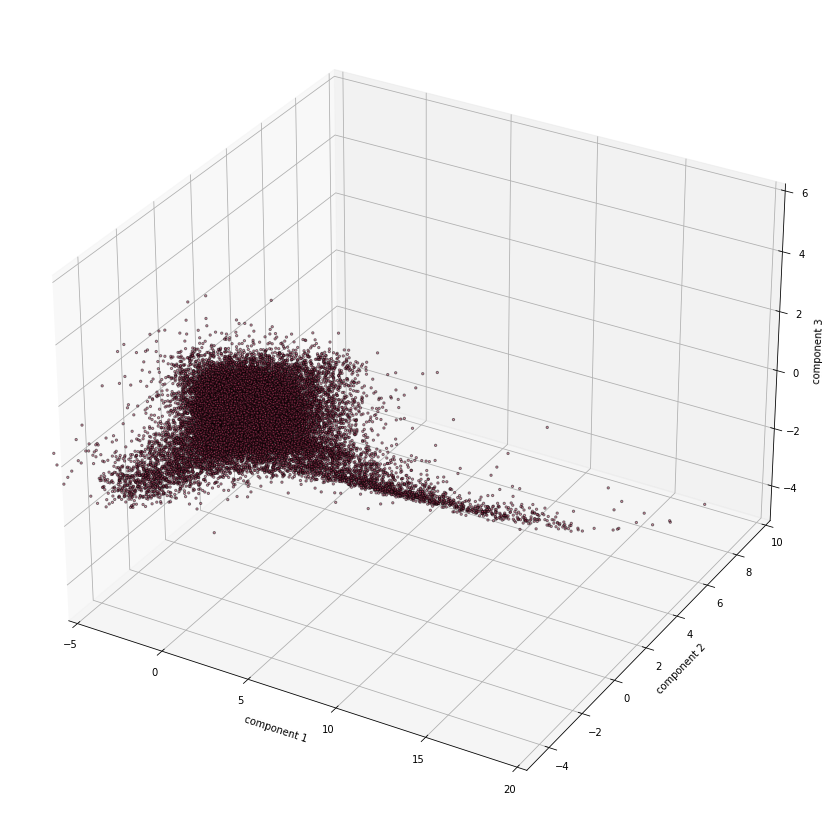

In [12]:
from matplotlib import animation

fig, ax = plt.subplots(figsize=(15, 15)), plt.axes(projection='3d')

ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
            c=sns.xkcd_rgb['dark pink'], s=5, edgecolor='black', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
ax.set(xlim=[-5.0, 20.0], ylim=[-5.0, 10.0], zlim=[-5.0, 6.0])

#ax.set_aspect("equal")
#plt.savefig("PC1_PC2_input_luis.pdf")

Text(0, 0.5, '$PC3$')

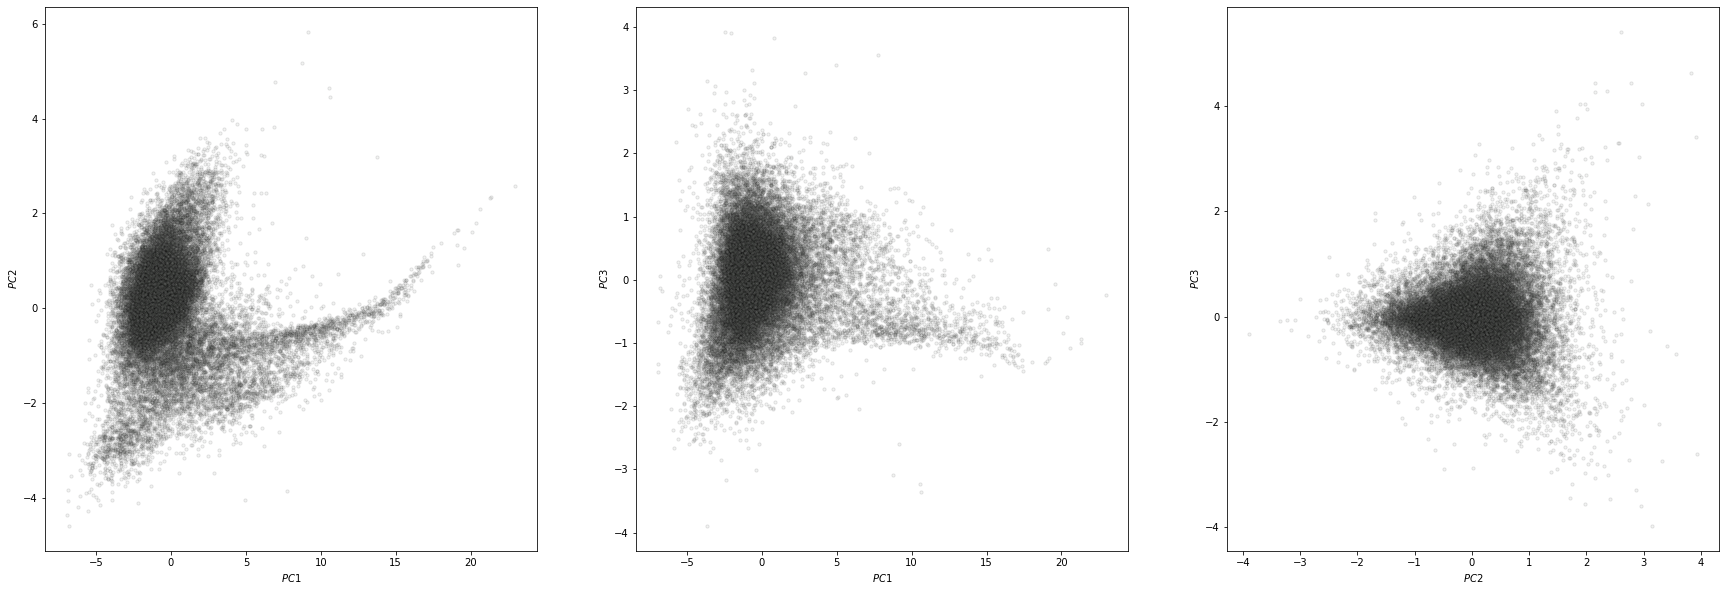

In [13]:
# Plots in 2-D
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))

#m = xx["Label"] == 6
ax1.scatter(X_pca[:, 0], X_pca[:, 1],
            c=sns.xkcd_rgb['grey'], s=10, edgecolor='black', alpha=0.1,
            cmap=plt.cm.get_cmap('Accent', 10))
ax2.scatter(X_pca[:, 0], X_pca[:, 2],
            c=sns.xkcd_rgb['grey'], s=10, edgecolor='black', alpha=0.1,
            cmap=plt.cm.get_cmap('Accent', 10))
ax3.scatter(X_pca[:, 2], X_pca[:, 3],
            c=sns.xkcd_rgb['grey'], s=10, edgecolor='black', alpha=0.1,
            cmap=plt.cm.get_cmap('Accent', 10))
ax1.set_xlabel(r'$PC1$')
ax1.set_ylabel(r'$PC2$')
ax2.set_xlabel(r'$PC1$')
ax2.set_ylabel(r'$PC3$')
ax3.set_xlabel(r'$PC2$')
ax3.set_ylabel(r'$PC3$')
#ax1.set(xlim=[9, 20.5], ylim=[-0.5, 13])

PC2 - PC1 diagram especially exhibits a high-density zone. I think these objects are the same that populate the zone of high density on the diagrams of the other repository.

# Weights PCs

In [14]:
# Eigenvalues
w = pca.components_
print("Shape weights:", w.shape)

Shape weights: (9, 11)


In [15]:
var = ["KRON_RADIUS", "MU_MAX", "J0410", 'J0430', "g", "J0515", "r", "J0660", 
         "i", "J0861", "z"]
var_n = [i for i in range(len(var))]
var_n

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [16]:
#plt.figure(figsize=(20, 8))

#plt.subplot(231)
#plt.plot(var_n, w[0], "go--", ms=9)
#plt.margins(0.2)
#plt.xticks(var_n, var, rotation=70)
#plt.title("PC1")

#plt.subplot(232)
#plt.plot(var_n, w[1],"ro--", ms=9)
#plt.margins(0.2)
#plt.xticks(var_n, var, rotation=70)
#plt.title("PC2")

#plt.subplot(233)
#plt.plot(var_n, w[2], "o--", ms=9)
#plt.margins(0.2)
#plt.xticks(var_n, var, rotation=70)
#plt.title("PC3")

#plt.show()

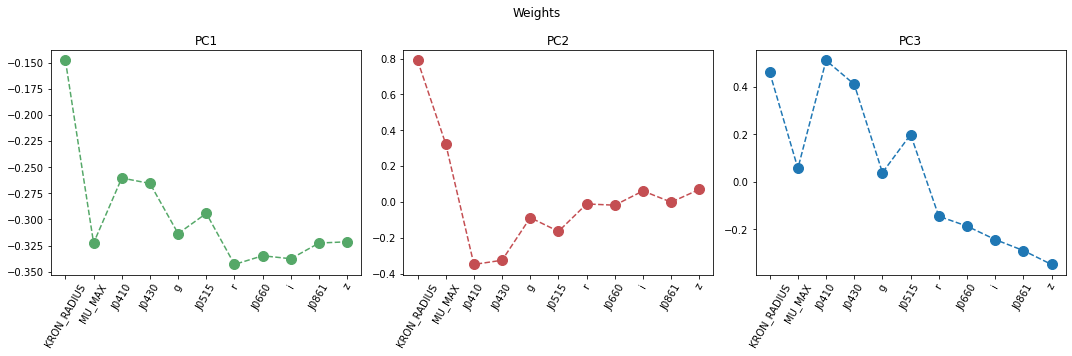

In [21]:
pcs = ["PC1", "PC2", "PC3"]
mcolor = ["go--", "ro--", "o--"]
fig2, axes = plt.subplots(
    1, 3, #sharex=True, sharey=True,
    figsize=(15, 5),
)
for ax, pc, mcolor_, i in zip(axes.flat, pcs, mcolor, range(3)):
    ax.plot(var_n, w[i], mcolor_, ms=10)
    #plt.xticks(var_n, var, rotation=70)
    ax.set_xticks(var_n)
    ax.set_xticklabels(var, minor=False, rotation=60)
    ax.set_title(pc)
#axes[-1, -1].remove()
fig2.suptitle("Weights")
fig2.tight_layout()
#fig.savefig("")

- Kron Radius is the lest contributing to PC1, which the einvevalue is -0.15. Mu max and the filters r and i  seem to contribute to this first component.
- Kron Radius and Mu Max are the most imposrtant contributing in PC2. On the other hand J0410, J0430 and to a lesser extent J0515 seem to contribute as well.
- The most contributing for PC3 are Kron radius and the J0410, J0430 and z filters.

May be I could try color color diagrams with these filter?